# Imports

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [92]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset preparation

In [93]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/'
df = pd.read_csv(root_dir + "dataset.csv")

In [94]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## Drop id Column

In [95]:
df.drop(['id'], axis=1, inplace=True)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

## Splitting the features and the labels

In [96]:
features = df.iloc[:, 1:]
targets = df.iloc[:, 0]

In [97]:
features

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

# Dataset Exploration

In [98]:
features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

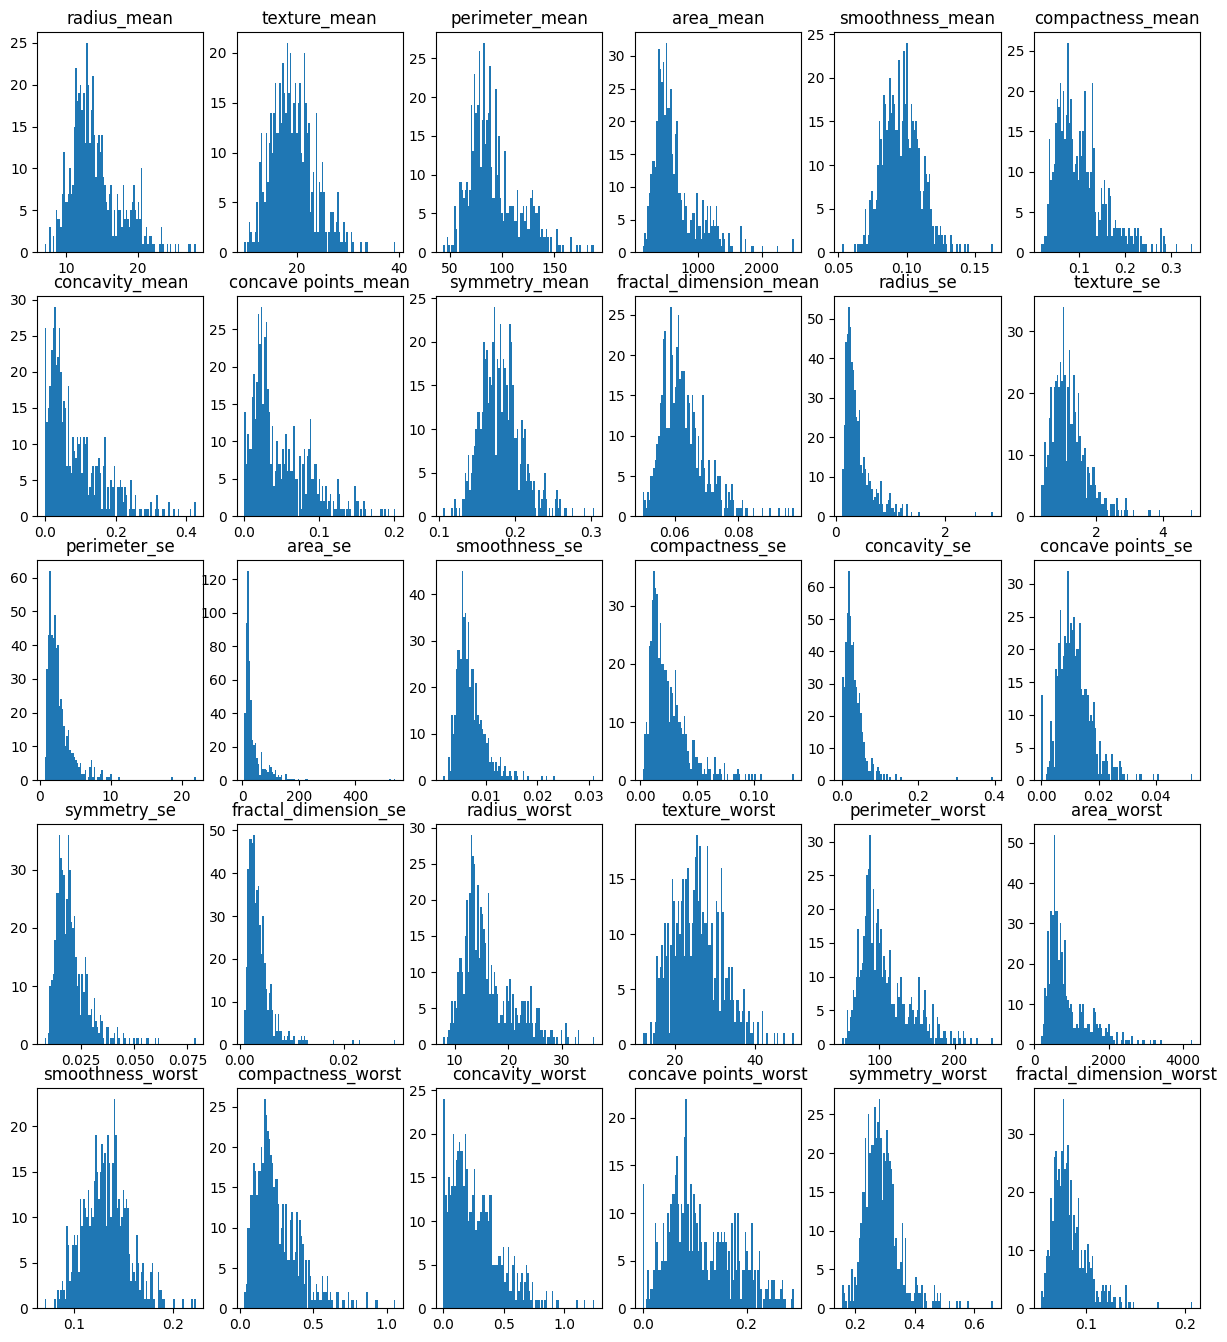

In [99]:
plt.figure(figsize=(15, 20))
for i in range(features.shape[1]):
    plt.subplot(6, 6, i+1)
    plt.hist(features.iloc[:, i], np.linspace(features.iloc[:, i].min(), features.iloc[:, i].max(), 100))
    plt.title(features.columns[i])
plt.show()

In [100]:
target_counts = targets.value_counts()
target_counts

B    357
M    212
Name: diagnosis, dtype: int64

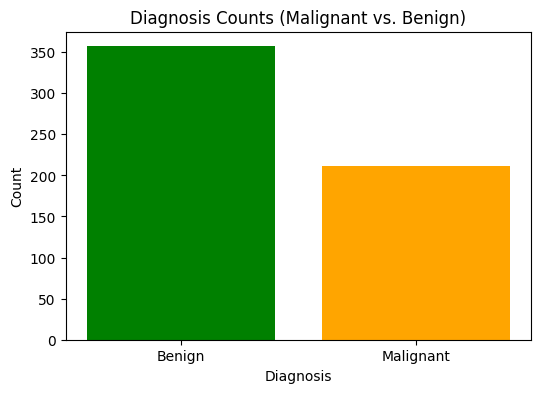

In [101]:
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['green', 'orange'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts (Malignant vs. Benign)')
plt.xticks(target_counts.index, ['Benign', 'Malignant'])
plt.show()

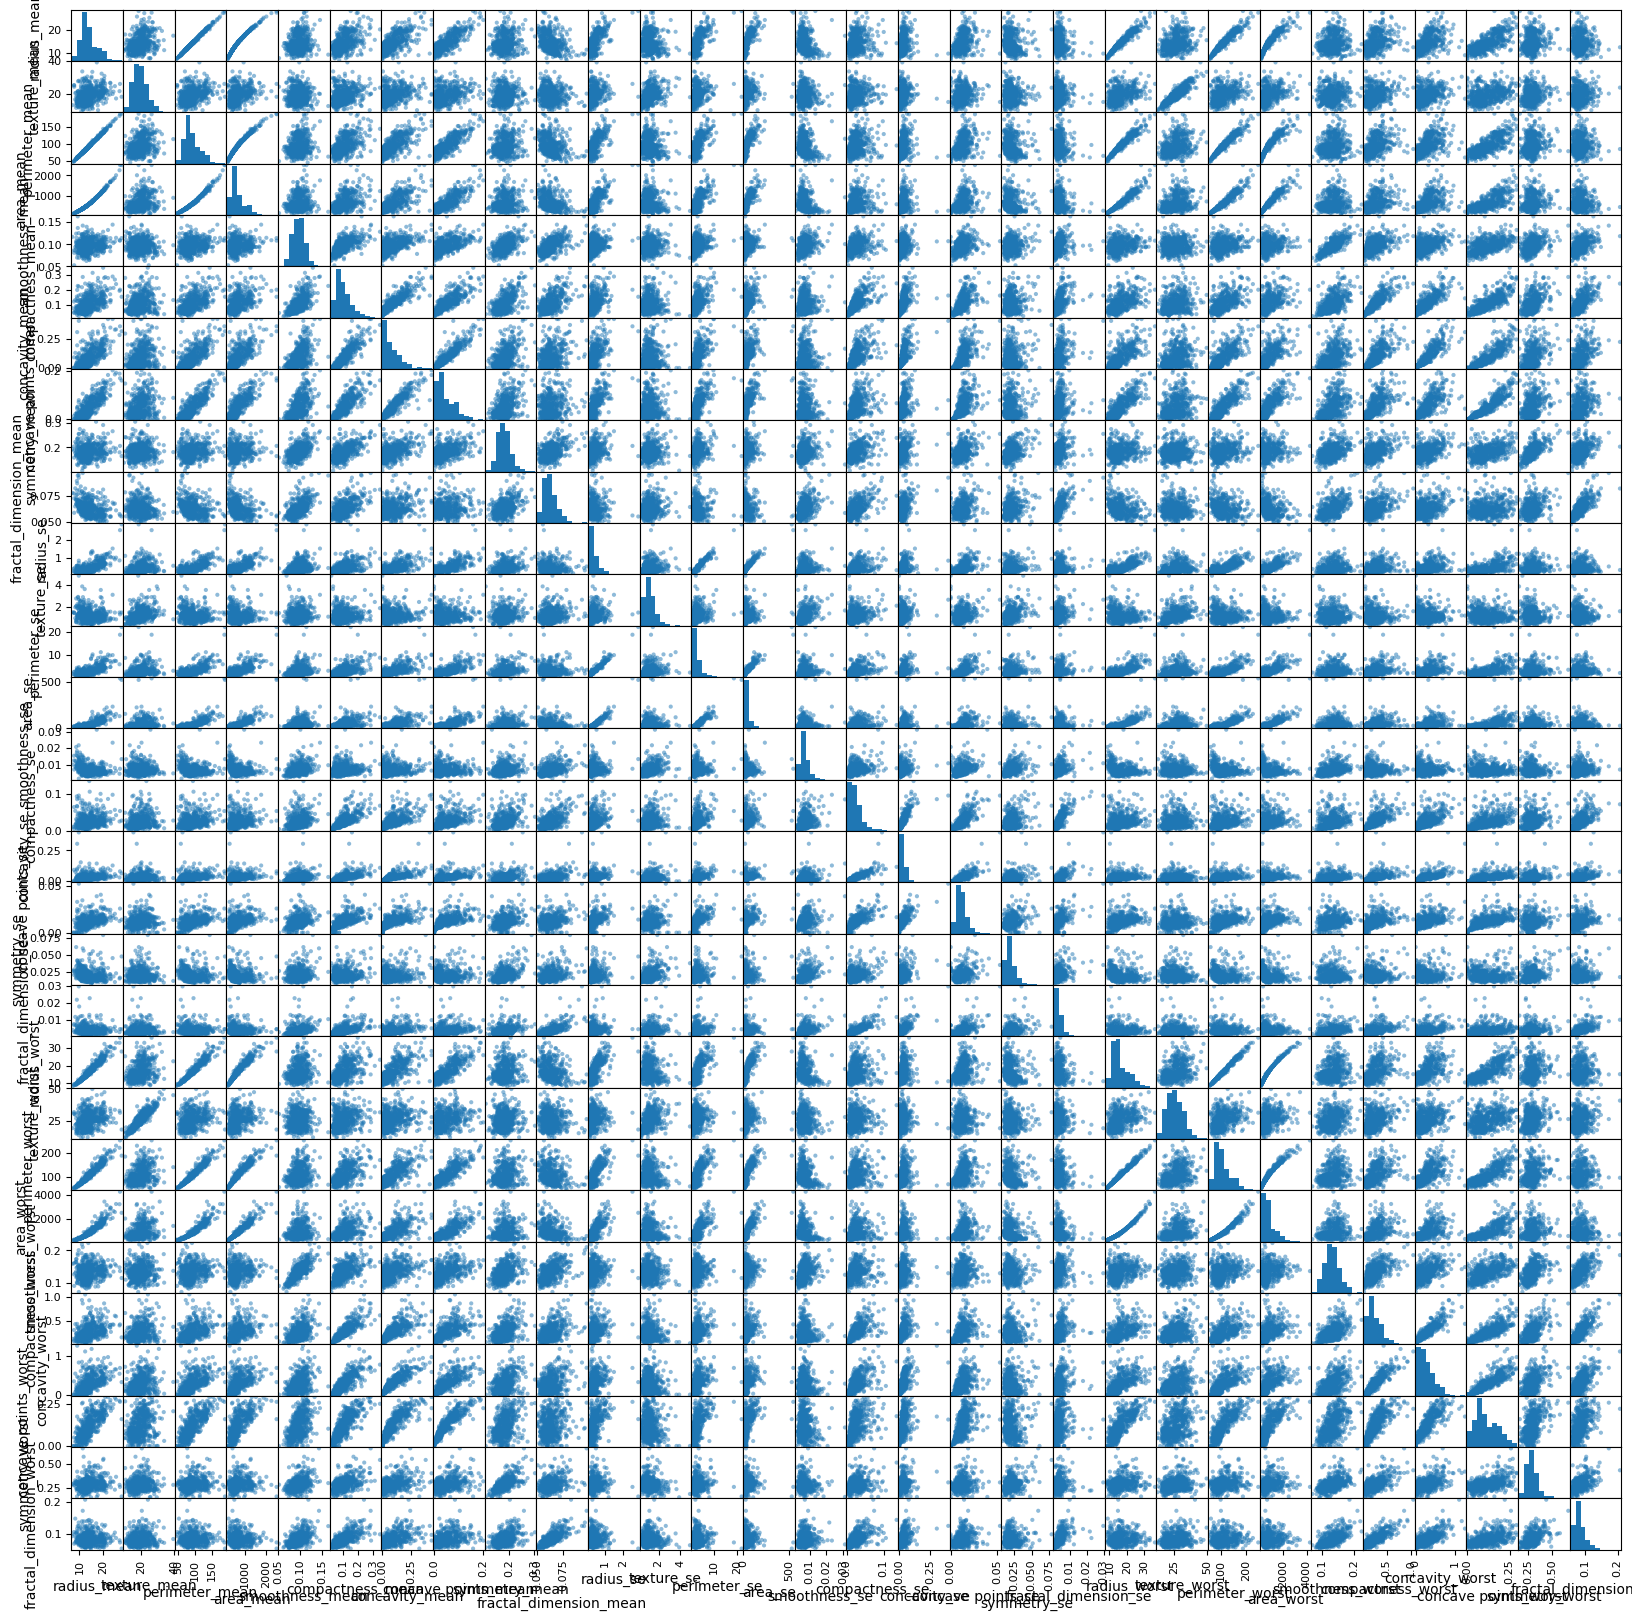

In [102]:
pd.plotting.scatter_matrix(features, figsize = (20, 20))
plt.show()

In [103]:
corr_mat = features.corr()
corr_mat

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

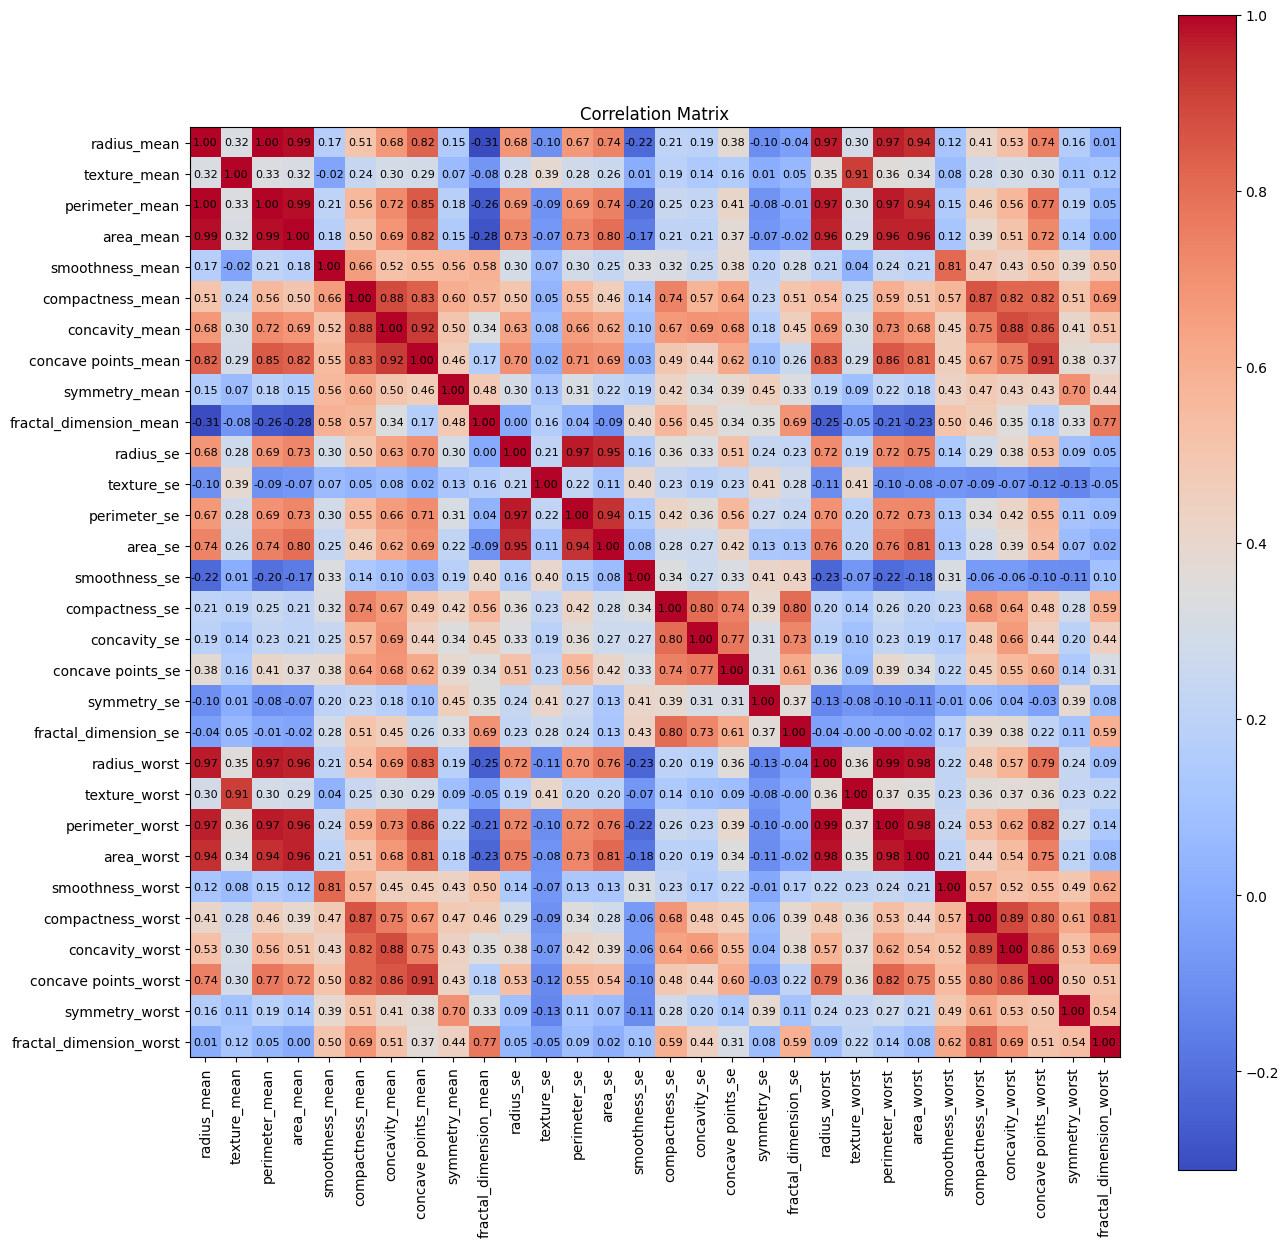

In [104]:
plt.figure(figsize=(15, 15))
corrImg = plt.imshow(corr_mat, cmap='coolwarm')

plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)

plt.colorbar(corrImg)

for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        text = "{:.2f}".format(corr_mat.iloc[i, j])
        plt.text(i, j, text, ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Matrix')
plt.show()

In [105]:
for feature in features.columns:
    benign_group = df[df['diagnosis'] == 'B'][feature]
    malignant_group = df[df['diagnosis'] == 'M'][feature]

    t_statistic, _ = stats.ttest_ind(benign_group, malignant_group)

    print(f"Feature: {feature}")
    print(f"T-Statistic: {abs(t_statistic):.4f}\n")

Feature: radius_mean
T-Statistic: 25.4358

Feature: texture_mean
T-Statistic: 10.8672

Feature: perimeter_mean
T-Statistic: 26.4052

Feature: area_mean
T-Statistic: 23.9387

Feature: smoothness_mean
T-Statistic: 9.1461

Feature: compactness_mean
T-Statistic: 17.6984

Feature: concavity_mean
T-Statistic: 23.1040

Feature: concave points_mean
T-Statistic: 29.3543

Feature: symmetry_mean
T-Statistic: 8.3383

Feature: fractal_dimension_mean
T-Statistic: 0.3057

Feature: radius_se
T-Statistic: 16.3964

Feature: texture_se
T-Statistic: 0.1977

Feature: perimeter_se
T-Statistic: 15.9342

Feature: area_se
T-Statistic: 15.6093

Feature: smoothness_se
T-Statistic: 1.5994

Feature: compactness_se
T-Statistic: 7.2971

Feature: concavity_se
T-Statistic: 6.2462

Feature: concave points_se
T-Statistic: 10.6425

Feature: symmetry_se
T-Statistic: 0.1553

Feature: fractal_dimension_se
T-Statistic: 1.8623

Feature: radius_worst
T-Statistic: 29.3391

Feature: texture_worst
T-Statistic: 12.2310

Feature: p

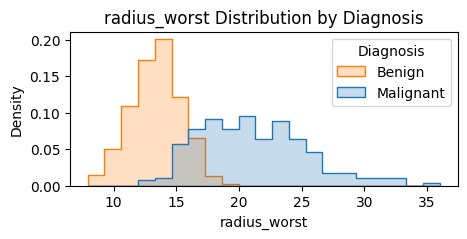

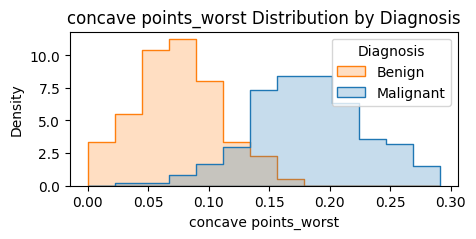

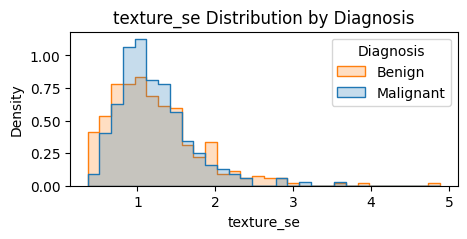

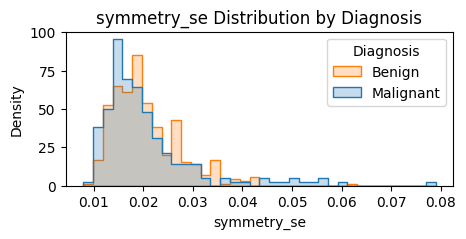

In [106]:
features_to_plot = ['radius_worst', 'concave points_worst', 'texture_se', 'symmetry_se']

for feature in features_to_plot:
    plt.figure(figsize=(5, 2))
    sns.histplot(data=df, x=feature, hue='diagnosis', element='step', stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
    plt.show()

# Preprocessing

## Label Encoding

In [107]:
label_encoder = preprocessing.LabelEncoder()
targets = label_encoder.fit_transform(targets)
targets

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [108]:
np.sum(targets == 0) # Benign

357

In [109]:
np.sum(targets == 1) # Malignant

212

## Feature Selection

In [110]:
high_corr_drop_col = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst']

In [111]:
features.drop(high_corr_drop_col, axis=1, inplace = True)
features

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.1812   
2           0.19740              0.12790         0.2069   
3           0.24140              0.10520         0.2597   
4           0.19800              0.10430         0.1809   
..              ...                  ...            ...   
564         0.24390              0.13890         0.1726   
565         0.14400              0.09791         0.1752   
566         0.09251              0.05302         0.1590   
567         0.35140              0.15200         0.2397   
568         0.00000              0.00000         0.1587   

     fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
0                   0.07871     1.0950      0.9053  ...      0.03003   
1                   0.05667     0.5435      0.7339  ...      0.01389   
2                   0.05999     0.7456      0.7869  ...      0.02250   
3                   0.09744     0.4956      1.1560  ...      0.05963   
4                   0.05883     0.7572      0.7813  ...      0.01756   
..                      ...        ...         ...  ...          ...   
564                 0.05623     1.1760      1.2560  ...      0.01114   
565                 0.05533     0.7655      2.4630  ...      0.01898   
566                 0.05648     0.4564      1.0750  ...      0.01318   
567                 0.07016     0.7260      1.5950  ...      0.02324   
568                 0.05884     0.3857      1.4280  ...      0.02676   

     fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
0                0.006193        25.380          17.33           0.16220   
1                0.003532        24.990          23.41           0.12380   
2                0.004571        23.570          25.53           0.14440   
3                0.009208        14.910          26.50           0.20980   
4                0.005115        22.540          16.67           0.13740   
..                    ...           ...            ...               ...   
564              0.004239        25.450          26.40           0.14100   
565              0.002498        23.690          38.25           0.11660   
566              0.003892        18.980          34.12           0.11390   
567              0.006185        25.740          39.42           0.16500   
568              0.002783         9.456          30.37           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215  

## Scalling

In [112]:
features = (features - features.min())/(features.max() - features.min())
features

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       0.521037      0.022658         0.593753          0.792037   
1       0.643144      0.272574         0.289880          0.181768   
2       0.601496      0.390260         0.514309          0.431017   
3       0.210090      0.360839         0.811321          0.811361   
4       0.629893      0.156578         0.430351          0.347893   
..           ...           ...              ...               ...   
564     0.690000      0.428813         0.526948          0.296055   
565     0.622320      0.626987         0.407782          0.257714   
566     0.455251      0.621238         0.288165          0.254340   
567     0.644564      0.663510         0.588336          0.790197   
568     0.036869      0.501522         0.000000          0.074351   

     concavity_mean  concave points_mean  symmetry_mean  \
0          0.703140             0.731113       0.686364   
1          0.203608             0.348757       0.379798   
2          0.462512             0.635686       0.509596   
3          0.565604             0.522863       0.776263   
4          0.463918             0.518390       0.378283   
..              ...                  ...            ...   
564        0.571462             0.690358       0.336364   
565        0.337395             0.486630       0.349495   
566        0.216753             0.263519       0.267677   
567        0.823336             0.755467       0.675253   
568        0.000000             0.000000       0.266162   

     fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
0                  0.605518   0.356147    0.120469  ...     0.311645   
1                  0.141323   0.156437    0.082589  ...     0.084539   
2                  0.211247   0.229622    0.094303  ...     0.205690   
3                  1.000000   0.139091    0.175875  ...     0.728148   
4                  0.186816   0.233822    0.093065  ...     0.136179   
..                      ...        ...         ...  ...          ...   
564                0.132056   0.385479    0.197976  ...     0.045843   
565                0.113100   0.236828    0.464728  ...     0.156160   
566                0.137321   0.124896    0.157974  ...     0.074548   
567                0.425442   0.222524    0.272896  ...     0.216103   
568                0.187026   0.099294    0.235988  ...     0.265633   

     fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
0                0.183042      0.620776       0.141525          0.601136   
1                0.091110      0.606901       0.303571          0.347553   
2                0.127006      0.556386       0.360075          0.483590   
3                0.287205      0.248310       0.385928          0.915472   
4                0.145800      0.519744       0.123934          0.437364   
..                    ...           ...            ...               ...   
564              0.115536      0.623266       0.383262          0.461137   
565              0.055387      0.560655       0.699094          0.300007   
566              0.103547      0.393099       0.589019          0.282177   
567              0.182766      0.633582       0.730277          0.619626   
568              0.065234      0.054287       0.489072          0.124084   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.619292         0.568610              0.912027        0.598462   
1             0.154563         0.192971              0.639175        0.233590   
2             0.385375         0.359744              0.835052        0.403706   
3             0.814012         0.548642              0.884880        1.000000   
4             0.172415         0.319489              0.558419        0.157500   
..                 ...              ...                   ...             ...   
564           0.178527         0.328035              0.761512        0.097575   
565           0.159997         0.256789  

## Feature Extraction

In [113]:
pca = PCA(.9)
pca.fit(features)

PCA(n_components=0.9)

In [114]:
pca.singular_values_

array([12.16522488,  6.63989268,  4.98184299,  4.52472651,  3.74130229,
        3.29571535])

In [115]:
pca.components_

array([[ 0.22600807,  0.10226602,  0.14791523,  0.2944473 ,  0.34781472,
         0.35169637,  0.151258  ,  0.10462217,  0.11892863,  0.0074971 ,
         0.01107011,  0.17296749,  0.08704605,  0.15154101,  0.03206037,
         0.07284528,  0.24686851,  0.12628415,  0.17067255,  0.25698875,
         0.29455414,  0.41766055,  0.12878688,  0.14291446],
       [-0.39343367, -0.1615875 ,  0.19185148,  0.13928916, -0.00443475,
        -0.14595254,  0.20364538,  0.45775915, -0.10316984,  0.06892399,
         0.18072062,  0.2042144 ,  0.0892711 ,  0.07307861,  0.18307191,
         0.19036674, -0.38531854, -0.16498267,  0.19451302,  0.10855631,
         0.03792789, -0.14235951,  0.11753165,  0.23854509],
       [-0.10966465,  0.57453838, -0.10749919, -0.03084677, -0.0217098 ,
        -0.10999734, -0.01405006,  0.03361183,  0.005594  ,  0.40400648,
         0.0913169 ,  0.10445289,  0.04059093,  0.01573852,  0.09700929,
         0.06865941, -0.09192108,  0.63383757, -0.06008603,  0.0159333 ,
  

In [116]:
features = pca.transform(features)

In [117]:
features

array([[ 1.29196891,  0.31096576, -0.51879586,  0.04904789, -0.04975586,
         0.19560747],
       [ 0.17207311, -0.43865187, -0.22942956,  0.0250207 ,  0.00294103,
         0.01533703],
       [ 0.80351731, -0.20653419, -0.17089048,  0.05664036, -0.06757198,
         0.06819919],
       ...,
       [ 0.12412437, -0.33291734,  0.28135163,  0.01686679,  0.20679831,
        -0.077482  ],
       [ 1.59415403,  0.02646264,  0.26682415, -0.15096607,  0.079748  ,
         0.1091975 ],
       [-0.79618957, -0.05368278,  0.37973245,  0.00696151,  0.09350461,
         0.20383593]])

In [118]:
features.shape

(569, 6)

## Train-Test Split

In [119]:
seed = 5

In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=seed)

In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 6), (114, 6), (455,), (114,))

# Models

## Naive Bayes

In [122]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.91      0.88      0.89        48

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



## Decision Tree

In [123]:
for i in range(10):
  dt_model = DecisionTreeClassifier(max_depth=i+1, random_state=seed)
  dt_model.fit(X_train, y_train)
  dt_predictions = dt_model.predict(X_test)
  nb_accuracy = accuracy_score(y_test, nb_predictions)
  dt_accuracy = accuracy_score(y_test, dt_predictions)
  print(f"Decision Tree of max_depth={i+1} Accuracy: {dt_accuracy}")

Decision Tree of max_depth=1 Accuracy: 0.9035087719298246
Decision Tree of max_depth=2 Accuracy: 0.9122807017543859
Decision Tree of max_depth=3 Accuracy: 0.8947368421052632
Decision Tree of max_depth=4 Accuracy: 0.9210526315789473
Decision Tree of max_depth=5 Accuracy: 0.9210526315789473
Decision Tree of max_depth=6 Accuracy: 0.9122807017543859
Decision Tree of max_depth=7 Accuracy: 0.9122807017543859
Decision Tree of max_depth=8 Accuracy: 0.9298245614035088
Decision Tree of max_depth=9 Accuracy: 0.9298245614035088
Decision Tree of max_depth=10 Accuracy: 0.9298245614035088


In [124]:
dt_model = DecisionTreeClassifier(max_depth=8, random_state=seed)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.95      0.88      0.91        48

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## AdaBoost

In [125]:
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, learning_rate=1, random_state=seed)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_probs = adaboost_model.predict_proba(X_test)[:, 1]
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)
print(classification_report(y_test, adaboost_predictions))

AdaBoost Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## K-Nearest Neighbors (KNN)

In [126]:
for i in range(10):
  knn_model = KNeighborsClassifier(n_neighbors=i+1)
  knn_model.fit(X_train, y_train)
  knn_predictions = knn_model.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_predictions)
  print(f"KNN of n_neighbors={i+1} Accuracy: {knn_accuracy}")

KNN of n_neighbors=1 Accuracy: 0.9736842105263158
KNN of n_neighbors=2 Accuracy: 0.956140350877193
KNN of n_neighbors=3 Accuracy: 0.9649122807017544
KNN of n_neighbors=4 Accuracy: 0.9473684210526315
KNN of n_neighbors=5 Accuracy: 0.9649122807017544
KNN of n_neighbors=6 Accuracy: 0.9736842105263158
KNN of n_neighbors=7 Accuracy: 0.9649122807017544
KNN of n_neighbors=8 Accuracy: 0.9649122807017544
KNN of n_neighbors=9 Accuracy: 0.9473684210526315
KNN of n_neighbors=10 Accuracy: 0.9473684210526315


In [127]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_probs = knn_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        48

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## SVM

In [128]:
svm_model = SVC(kernel='sigmoid', random_state=seed)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9122807017543859


In [129]:
svm_model = SVC(kernel='poly', degree=3, random_state=seed)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9210526315789473


In [130]:
svm_model = SVC(kernel='linear', random_state=seed, probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Confusion Matrix

In [131]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

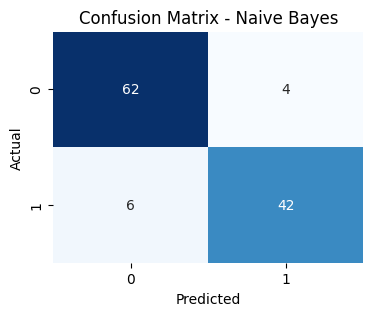

In [132]:
plot_confusion_matrix(y_test, nb_predictions, title='Confusion Matrix - Naive Bayes')

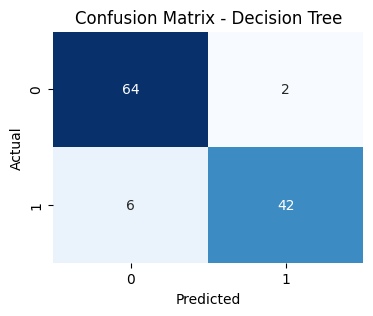

In [133]:
plot_confusion_matrix(y_test, dt_predictions, title='Confusion Matrix - Decision Tree')

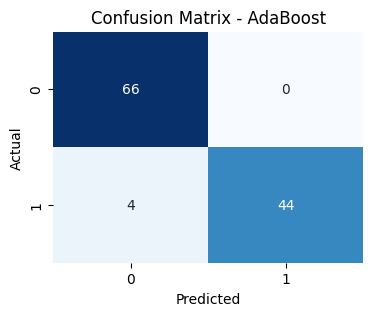

In [134]:
plot_confusion_matrix(y_test, adaboost_predictions, title='Confusion Matrix - AdaBoost')

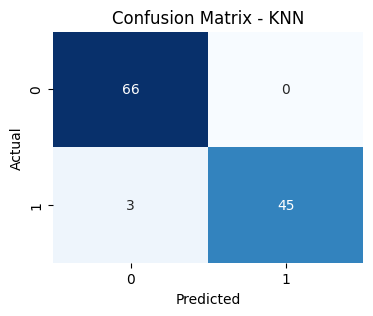

In [135]:
plot_confusion_matrix(y_test, knn_predictions, title='Confusion Matrix - KNN')

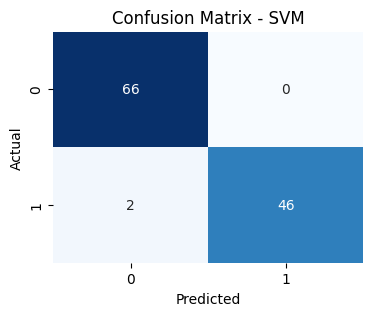

In [136]:
plot_confusion_matrix(y_test, svm_predictions, title='Confusion Matrix - SVM')

# AUC-ROC

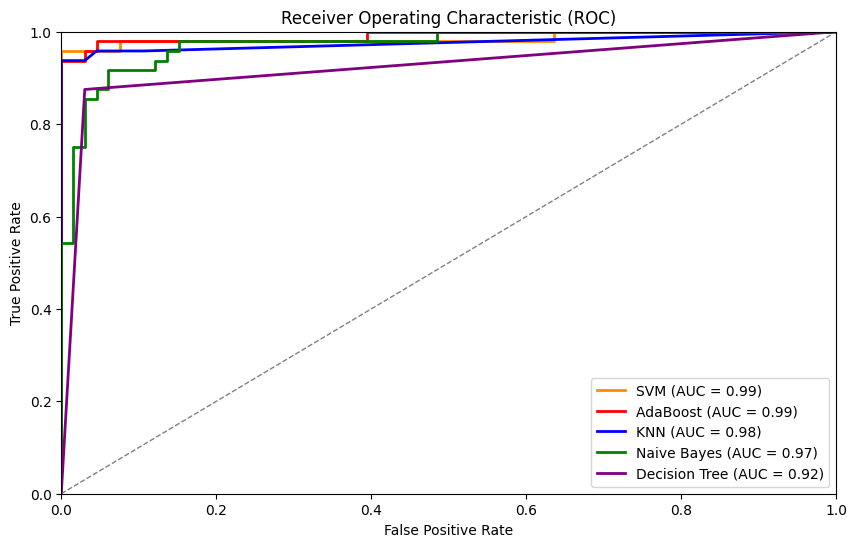

In [137]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
adaboost_auc = auc(adaboost_fpr, adaboost_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)


plt.figure(figsize=(10, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(adaboost_fpr, adaboost_tpr, color='red', lw=2, label=f'AdaBoost (AUC = {adaboost_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='green', lw=2, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()